In [97]:
import pandas as pd 
import seaborn as sns

In [283]:
#https://www.rte-france.com/fr/eco2mix/eco2mix-telechargement

data = pd.read_excel(r'/Users/yang/Downloads/eCO2mix_RTE_Annuel-Definitif_2018.xlsx') 
data.head()

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
0,France,Données définitives,2018-01-01,00:00:00,61127.0,56800.0,58900.0,164.0,36.0,2462.0,...,-1.0,2159.0,224.0,80.0,5997.0,1624.0,391.0,600.0,291.0,277.0
1,France,Données définitives,2018-01-01,00:15:00,NaN,56250.0,58300.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2018-01-01,00:30:00,59962.0,55700.0,57700.0,108.0,18.0,2471.0,...,8.0,2158.0,226.0,79.0,6100.0,2558.0,212.0,580.0,281.0,258.0
3,France,Données définitives,2018-01-01,00:45:00,NaN,54800.0,56750.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2018-01-01,01:00:00,57879.0,53900.0,55800.0,107.0,17.0,2474.0,...,8.0,2162.0,225.0,78.0,6028.0,2364.0,194.0,581.0,279.0,258.0


In [285]:
data['Date'].astype(str)[0]
data['ts']=data['Date'].astype(str)+' '+ data['Heures'].astype(str)

In [286]:
data=data.dropna(axis=0)
data['ts1']=pd.to_datetime(data['ts'])

In [287]:
data.columns

Index(['Périmètre', 'Nature', 'Date', 'Heures', 'Consommation',
       'Prévision J-1', 'Prévision J', 'Fioul', 'Charbon', 'Gaz', 'Nucléaire',
       'Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies',
       'Ech. physiques', 'Taux de Co2', 'Ech. comm. Angleterre',
       'Ech. comm. Espagne', 'Ech. comm. Italie', 'Ech. comm. Suisse',
       'Ech. comm. Allemagne-Belgique', 'Fioul - TAC', 'Fioul - Cogén.',
       'Fioul - Autres', 'Gaz - TAC', 'Gaz - Cogén.', 'Gaz - CCG',
       'Gaz - Autres', 'Hydraulique - Fil de l?eau + éclusée',
       'Hydraulique - Lacs', 'Hydraulique - STEP turbinage',
       'Bioénergies - Déchets', 'Bioénergies - Biomasse',
       'Bioénergies - Biogaz', 'ts', 'ts1'],
      dtype='object')

In [288]:
data
data=data.drop(columns=['Périmètre','Nature','Prévision J-1','Prévision J'])

In [290]:
jour=data.iloc[1:96,1:20]
jour3440=data.iloc[1728:1824,1:20]

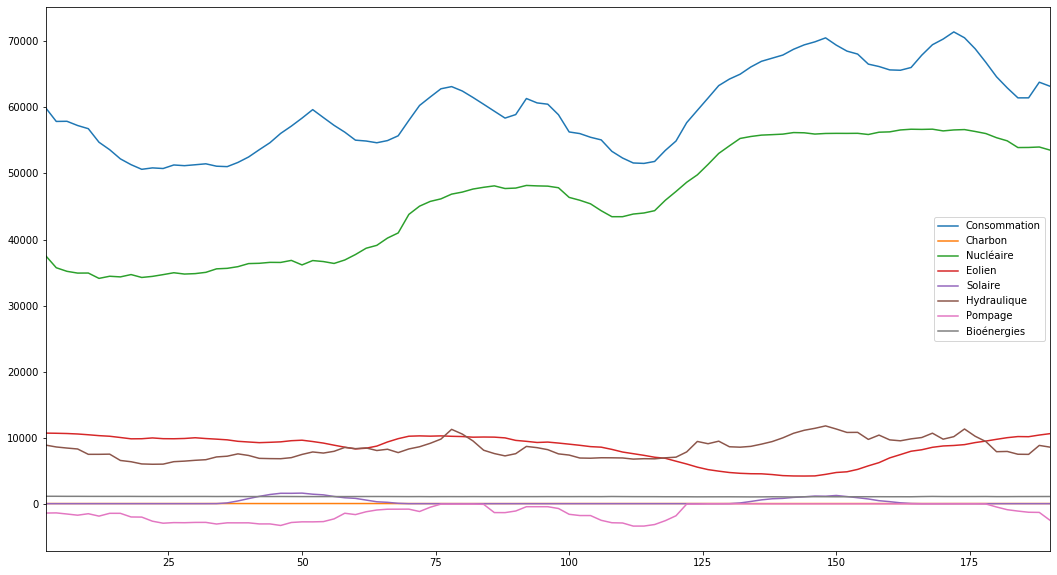

In [301]:
jourS=jour[['Consommation','Charbon',  'Nucléaire',
       'Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies']]
jourS.plot(figsize=[18 ,10])

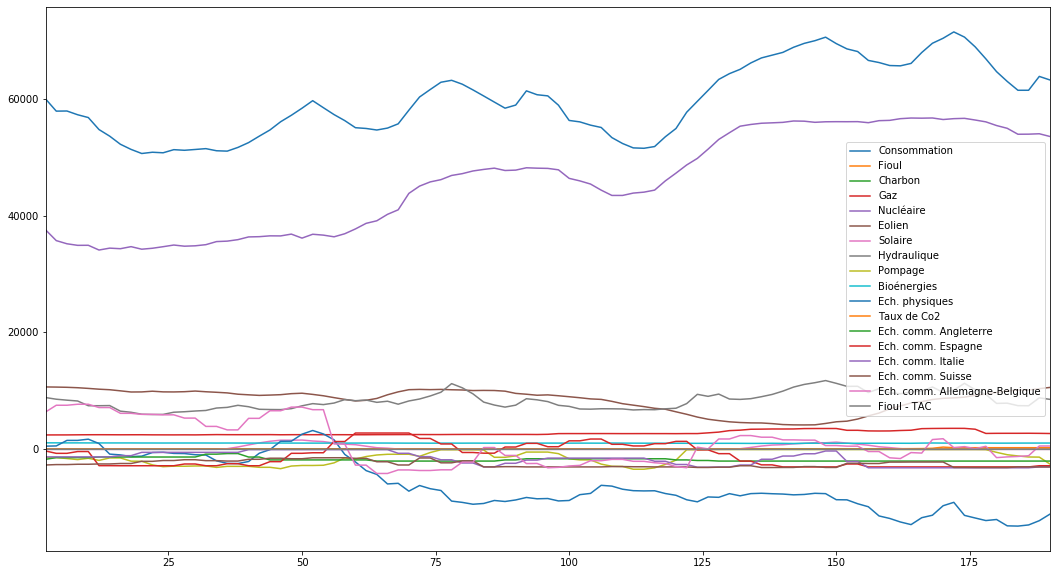

In [302]:
jour.plot(figsize=[18 ,10])

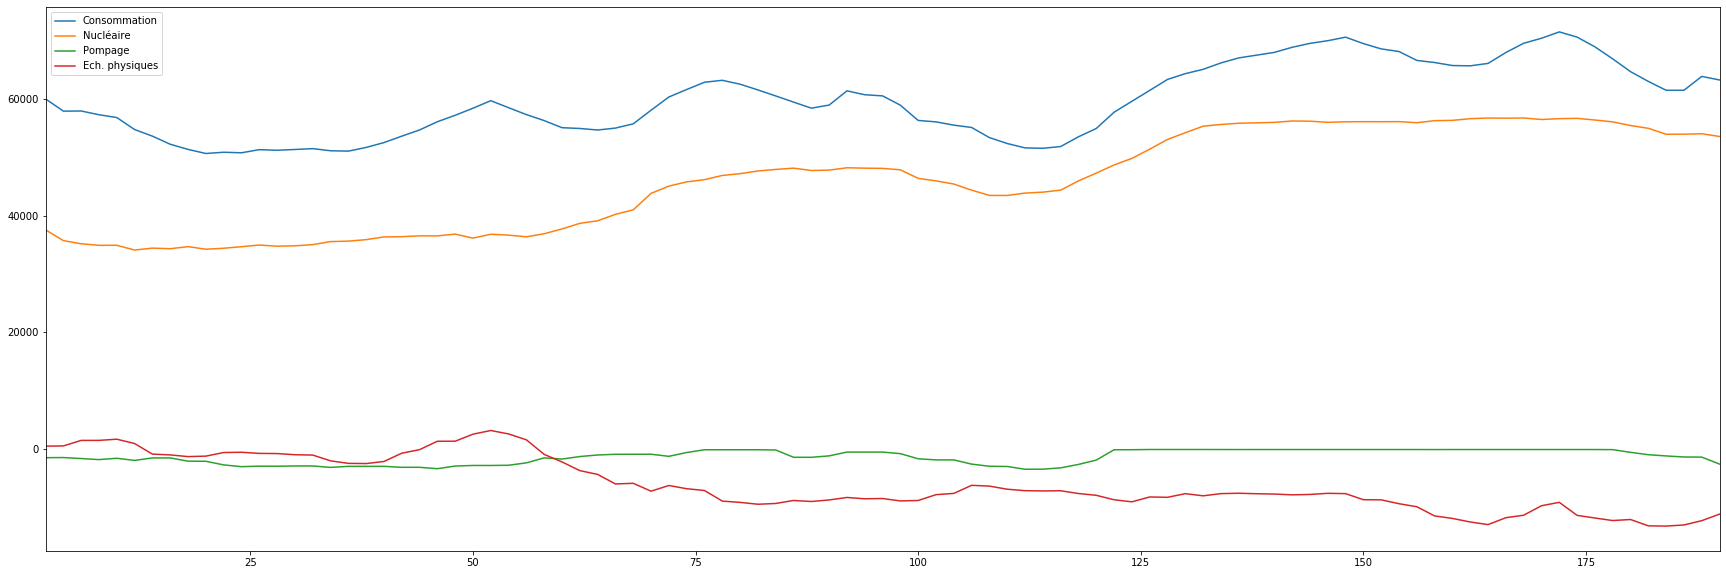

In [289]:
jour1=jour[['Consommation',
        'Nucléaire',
       'Pompage', 
       'Ech. physiques']]
jourS.plot(figsize=[30 ,10])

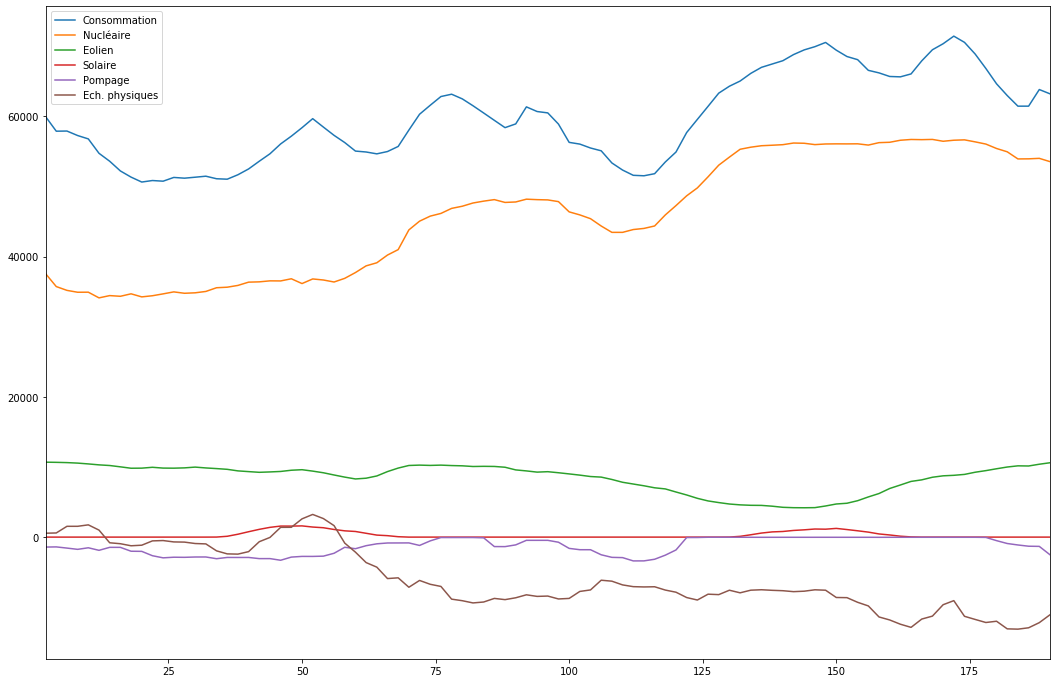

In [324]:
jourS=jour[['Consommation',
        'Nucléaire',
        'Eolien', 'Solaire','Pompage',
       'Ech. physiques']]
jourS.plot(figsize=[18 ,12])

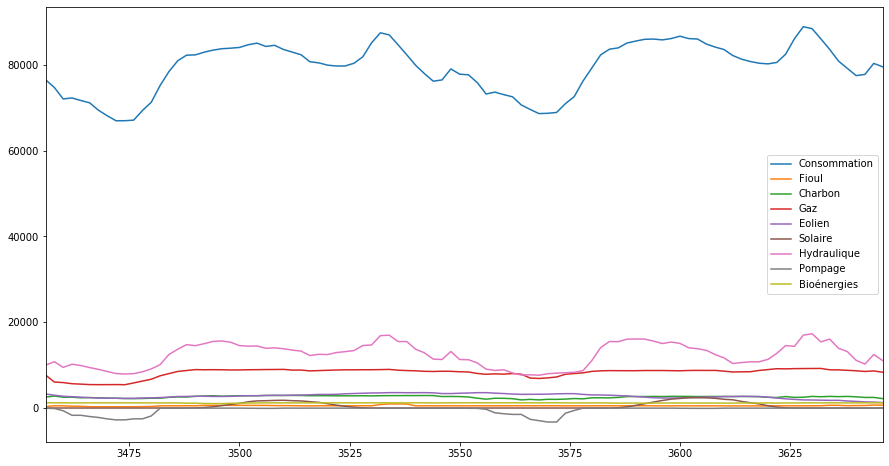

In [308]:
jour5fev=jour3440[['Consommation',
       'Fioul', 'Charbon', 'Gaz', 
       'Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies']]
jour5fev.plot(figsize=[15 ,8])

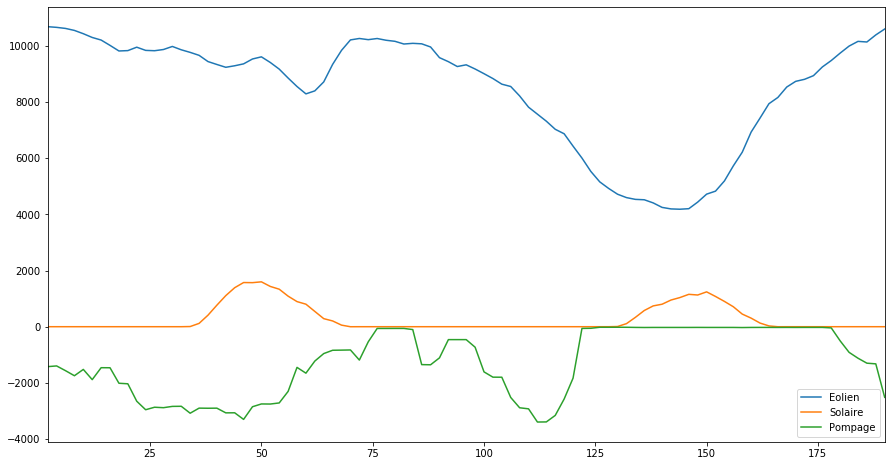

In [321]:
jour2=jour[[
       
       'Eolien', 'Solaire','Pompage']]
jour2.plot(figsize=[15 ,8])

In [260]:
data=data.set_index('ts1')
dataH=data.resample('H').mean()

In [278]:
dataM=data.resample('M').mean()
dataM

,Consommation,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
ts1,,,,,,,,,,,,,,,,,,,,,
2018-01-31,65102.593414,64139.502688,191.403898,416.118280,4095.276210,54787.254704,5382.196909,372.393145,9718.360887,-1080.085349,...,8.562500,2640.927419,1373.816532,72.118280,6307.592742,2655.129704,755.744624,549.389113,271.758065,260.831989
2018-02-28,74267.822917,73605.133929,499.690476,1464.116815,6916.585565,54170.811012,4136.699405,795.472470,10577.657738,-727.468750,...,41.980655,2930.115327,3863.363839,80.997768,6261.964286,3518.313988,797.420387,542.871280,350.352679,267.794643
2018-03-31,64878.378360,64142.002688,349.471102,1126.788306,5125.432796,47995.977823,4205.981183,1051.713038,9414.412634,-852.787634,...,24.713038,2462.608199,2542.142473,95.979167,6081.054435,2642.112231,691.309812,528.275538,294.443548,272.397177
2018-04-30,50079.099306,49665.694444,85.531250,343.592361,1150.315278,42457.552778,3005.018056,1418.091667,9545.438889,-935.638194,...,-0.228472,385.379861,702.817361,62.226389,6716.368056,2225.929861,603.220833,441.060417,383.275694,277.565278
2018-05-31,45406.817876,45059.660618,85.299059,211.857527,790.286962,41075.126344,2153.693548,1555.309140,10240.799731,-871.315860,...,-0.032930,375.159274,359.240591,55.696909,7126.856183,2404.098118,709.885081,517.869624,311.456989,266.559812
2018-06-30,45016.456250,44604.868056,84.220139,377.231944,999.455556,39734.494444,1905.204861,1800.245139,10463.787500,-744.685417,...,1.605556,279.611111,659.379861,58.673611,7018.670833,2772.885417,672.284722,477.139583,263.694444,271.544444
2018-07-31,46177.702285,46131.922043,90.801075,785.658602,2547.065188,40247.026210,1481.319220,1930.278226,7051.133737,-606.071237,...,1.856855,317.330645,2172.754704,54.844086,4387.059140,2061.947581,602.102151,521.600806,297.213038,269.838710
2018-08-31,43274.352151,43050.913978,106.042339,673.034274,2445.924059,36670.907258,1888.669355,1784.815188,5210.601478,-701.030914,...,3.688844,334.231855,2050.597446,57.084005,3092.396505,1533.262769,584.944892,521.362903,300.005376,268.399194
2018-09-30,45107.940972,45097.152778,183.876389,482.324306,2193.222917,41779.852083,2241.078472,1632.469444,4182.487500,-857.100694,...,-0.356250,375.515972,1756.768056,60.972222,2279.778472,1329.006250,573.702083,455.254167,359.757639,276.809028


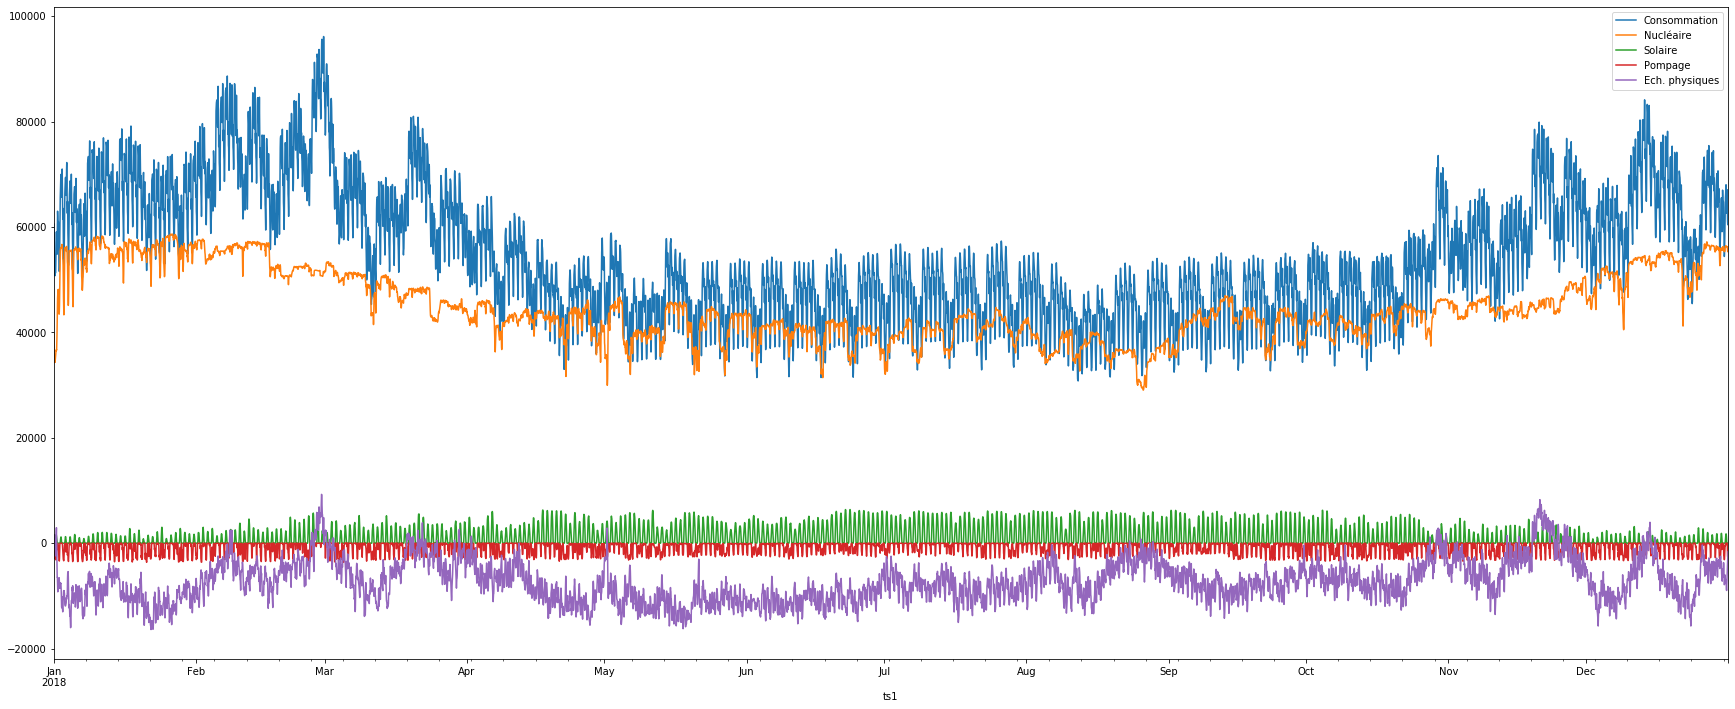

In [320]:
jour1=dataH[['Consommation',
        'Nucléaire','Solaire',
       'Pompage', 
       'Ech. physiques']]
jour1.plot(figsize=[30 ,12])

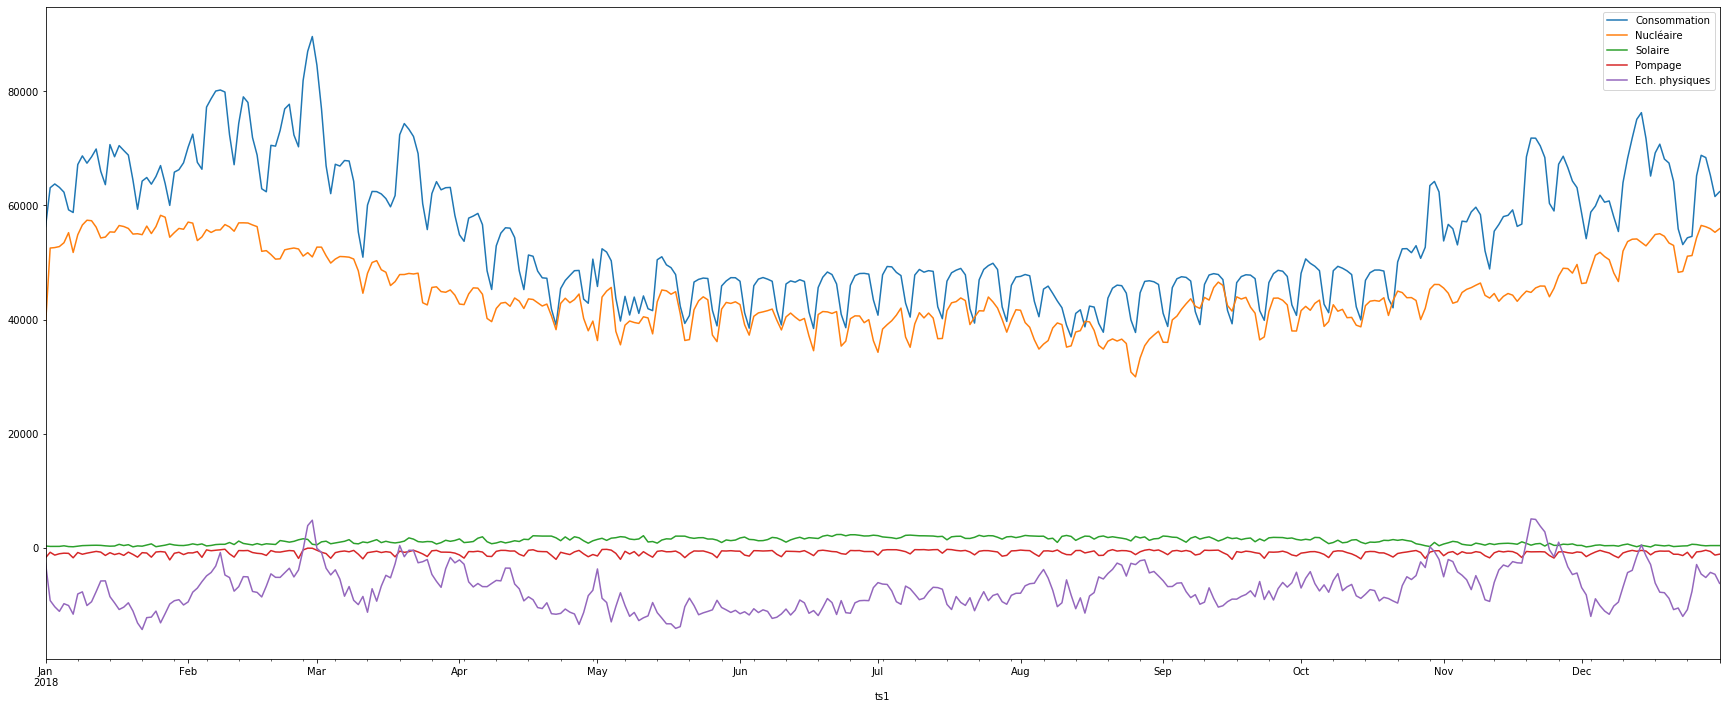

In [319]:
dataD=data.resample('D').mean()
jour1=dataD[[ 'Consommation',
        'Nucléaire','Solaire',
       'Pompage', 
       'Ech. physiques']]
jour1.plot(figsize=[30 ,12])

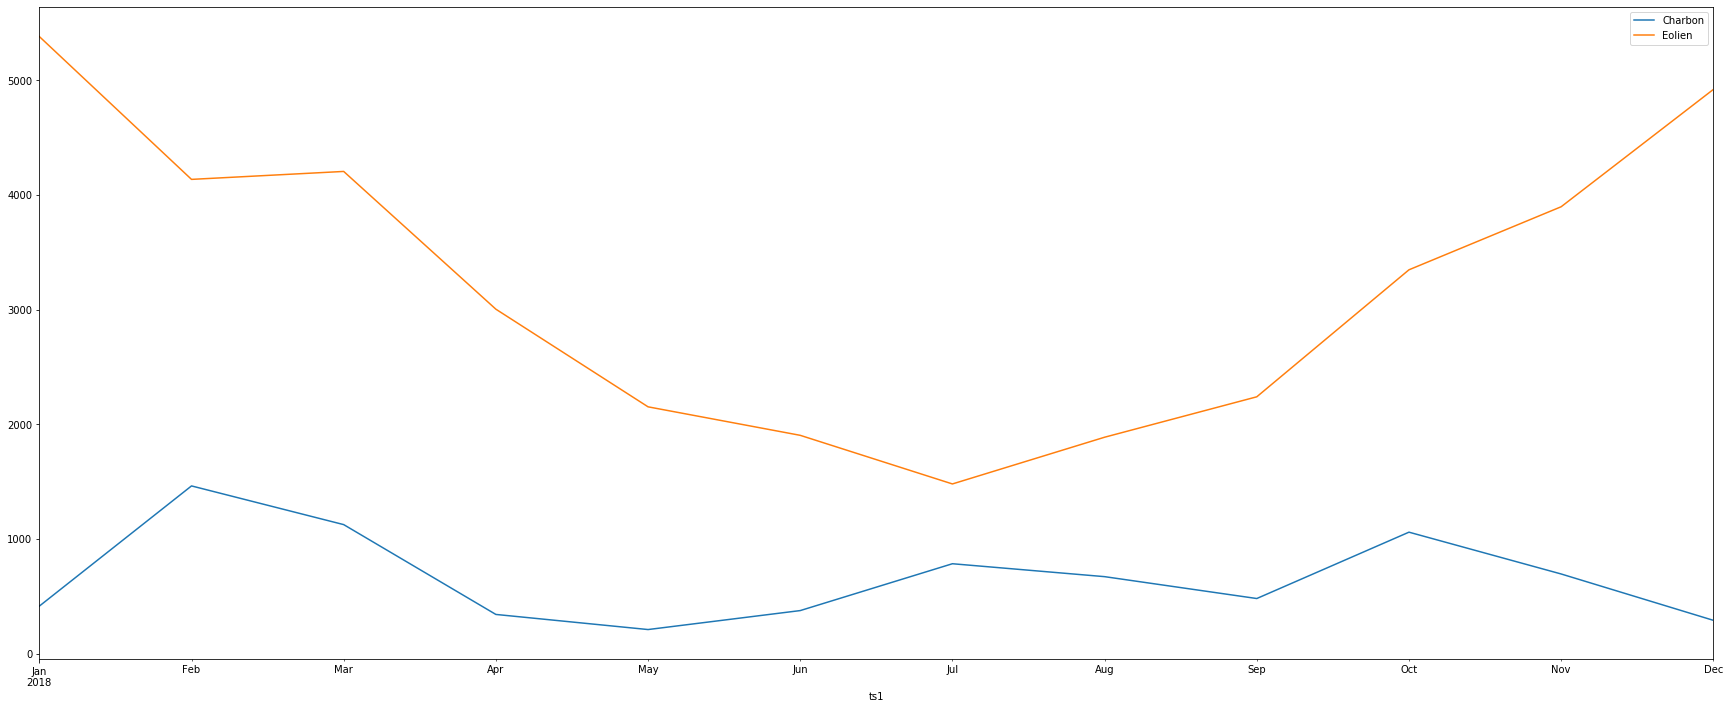

In [272]:
dataW=data.resample('M').mean()
jour1=dataW[[ 'Charbon', 
       'Eolien']]
jour1.plot(figsize=[30 ,12])